In [1]:
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.append("..") 
from utils import pull_data
from utils import plot_data_line_chart

In [2]:
ticker = "NKE"
df = pull_data(ticker)
df = df.reset_index()
df['Date'] = df['Date'].dt.tz_localize(None).dt.date


Filtered to last 3 years:  2022-03-31 00:00:00-04:00


In [3]:
print('Plotting Historical Stock Price')

Plotting Historical Stock Price


In [4]:
def plot_data_line_chart(df, start_date, end_date):
    # Filter the DataFrame based on the selected date range
    filtered_df = df[(df['Date'] >= pd.to_datetime(start_date)) & (df['Date'] <= pd.to_datetime(end_date))]
    # filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    # Plot using the 'Date' column instead of index
    plt.figure(figsize=(10, 5))
    plt.plot(filtered_df['Date'], filtered_df['Close'], label="Close Price")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

c:\Users\matt\Desktop\DataProjects\Stock_Analysis\stocks\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


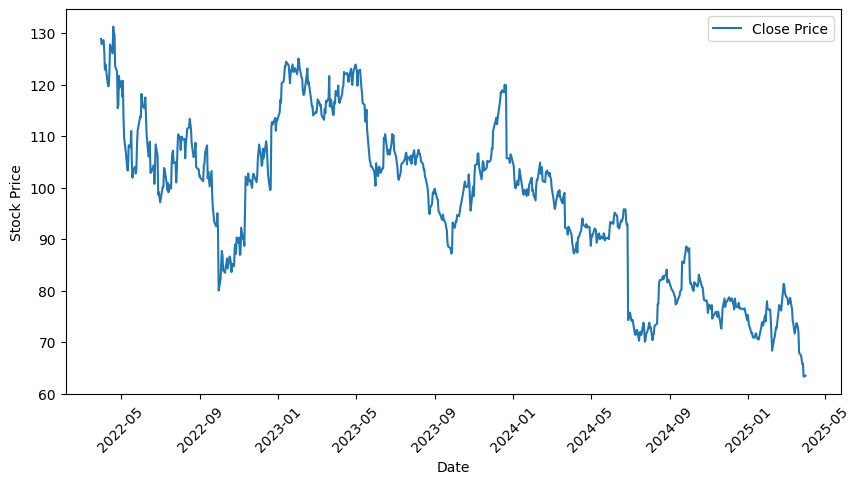

interactive(children=(Output(),), _dom_classes=('widget-interact',))

In [5]:
## Ploting History 
# Create interactive date range pickers 
start_date_picker = widgets.DatePicker(description="Start Date", value=df['Date'].min())
end_date_picker = widgets.DatePicker(description="End Date", value=df['Date'].max())


widgets.interactive(plot_data_line_chart(df, start_date=start_date_picker.value, end_date=end_date_picker.value))

In [10]:
def oo2(df, start_date, end_date):
    # Filter the DataFrame based on the selected date range
    filtered_df = df[(df['Date'] >= pd.to_datetime(start_date)) & (df['Date'] <= pd.to_datetime(end_date))]
    #filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    # Plot using the 'Date' column instead of index
    plt.figure(figsize=(10, 5))
    plt.plot(filtered_df['Date'], filtered_df['Close'], label="Close Price")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

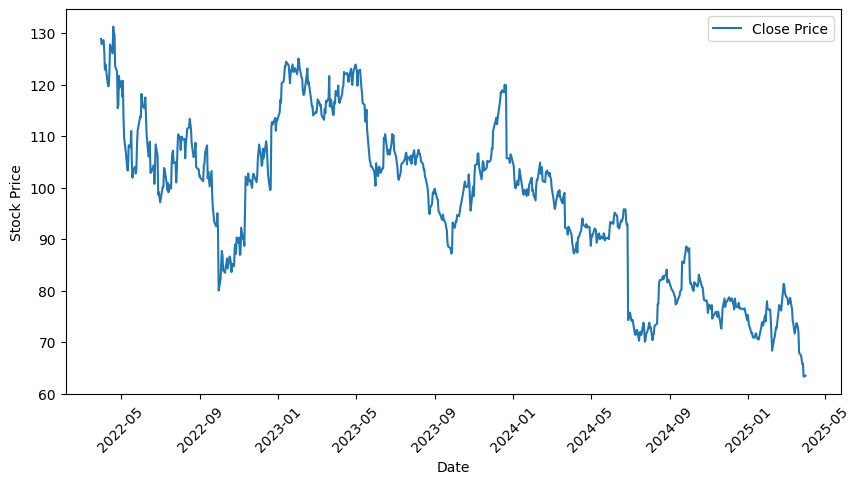

interactive(children=(Output(),), _dom_classes=('widget-interact',))

In [11]:
widgets.interactive(plot_data_line_chart(df, start_date=start_date_picker.value, end_date=end_date_picker.value))

In [12]:
oof = start_date_picker.value
oof

datetime.date(2022, 3, 31)

In [15]:
start_date_picker = widgets.DatePicker(
    description="Start Date", 
    value=pd.to_datetime('2022-04-04').date()  # Set the value to a datetime.date object
)
df[df['Date'] >= start_date_picker.value]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2,2022-04-04,127.410936,129.479392,127.228987,128.646255,5307300,0.0,0.0
3,2022-04-05,128.358955,128.971829,126.424579,126.692711,5707800,0.0,0.0
4,2022-04-06,124.538068,124.777472,120.975732,122.919693,6961000,0.0,0.0
5,2022-04-07,122.029119,124.471038,121.703526,123.896477,5320500,0.0,0.0
6,2022-04-08,123.953931,124.423154,122.460044,122.718597,4877400,0.0,0.0
...,...,...,...,...,...,...,...,...
747,2025-03-25,67.559998,68.050003,66.239998,66.540001,17394100,0.0,0.0
748,2025-03-26,66.379997,66.589996,64.949997,65.739998,18688300,0.0,0.0
749,2025-03-27,65.500000,67.099998,65.290001,65.800003,16435800,0.0,0.0
750,2025-03-28,65.860001,65.860001,63.139999,63.290001,19600300,0.0,0.0
